**Created on 12/12/2022**

**Authors: Amir Najjar, Sibel Yuksel**

**License: this code is released under the CeCILL 2.1 license. See https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt**

# Guide visualisation
Nous allons utiliser les librairie `matplotlib` et `seaborn`. `matplotlib` nous donne des fonctionnalités de visualisation simples et `seaborn` permettra d'avoir des fonctionnalités plus larges. Les règles et conventions ci-dessous permettent d'avoir une homogénéité entre les résultats de tous les groupes.

Ce notebook est inspiré des guides trouvés sur https://seaborn.pydata.org/tutorial.html et https://www.python-graph-gallery.com/.

Pour installer `seaborn` il suffit d'exécuter les commande `pip install matplotlib` et `pip install seaborn`.

In [2]:
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importations
Pour importer `matplotlib` et `seaborn`, utiliser les commande dessous. Les alias utilisés sont `plt` et `sns`.
Pour la représentation 3D, nous pouvons utiliser une autre librairie `mlp_toolkits.mplot3d` :

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pour la représentation 3D, on peut utiliser 
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# libraries pour créer des exemples
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Importation des données

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/M2 SID/PIP2023/Dataset_complete.csv')

In [8]:
df.columns

Index(['initiator', 'target', 'protocol', 'nlos_indicator', 't1', 't2', 't3',
       't4', 'skew', 'tof', 'tof_skew', 'range', 'range_skew', 'ranging_unit',
       'ranging_error', 'loc_initiator_x', 'loc_initiator_y',
       'loc_initiator_z', 'loc_target_x', 'loc_target_y', 'loc_target_z',
       'distance', 'course_dist', 'temperature_initiator',
       'temperature_target', 'timestamp', 'seqnum', 'rssi_request', 'rssi_ack',
       'rssi_data', 'rssi_mean', 'register_dump_CIR'],
      dtype='object')

In [9]:
df.head()

,initiator,target,protocol,nlos_indicator,t1,t2,t3,t4,skew,tof,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,register_dump_CIR
0,183,100,TWR,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,...,0.0,30.98,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,"{""ACC_MEM"": ""AAT/9gACAAr/+wABAAL/8wAS//AACgAGA..."
1,183,100,TWR,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,...,0.0,30.98,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,"{""ACC_MEM"": ""//gAEwAC//X/9gAXABEACwASABQAFgAG/..."
2,183,100,TWR,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,...,0.0,30.98,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,"{""ACC_MEM"": ""//QABQAJ//X/9gAUABMADv/3//r//gAK/..."
3,183,100,TWR,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,...,0.0,30.98,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,"{""ACC_MEM"": ""ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA..."
4,183,100,TWR,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,...,0.0,30.98,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,"{""ACC_MEM"": ""//b/+P/6//3/8QAI//H//P/1AAkAAv/3A..."


In [10]:
np.unique(df['target'])

array([100, 101, 150, 171, 180, 184])

# Définition du style de visualisation
Nous allons utiliser le style `darkgrid` en voici un exemple :

In [11]:
# On retire les variables qui sont constitué d'une seule est unique valeur
col = df.columns.tolist()
type(col)
col.remove('initiator')
col.remove('loc_initiator_z')

In [ ]:
df[col].corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))
# Cf. https://matplotlib.org/examples/color/colormaps_reference.html pour les codes couleurs

,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,range_skew,ranging_error,loc_initiator_x,loc_initiator_y,loc_target_x,loc_target_y,loc_target_z,distance,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean
target,1.0,0.096,-0.0019,-0.0019,-0.0019,-0.0019,-0.6,-0.36,-0.14,-0.36,-0.14,-0.37,0.015,-0.015,0.66,-0.5,0.085,-0.13,-0.015,-0.0087,0.5,-0.016,-0.016,0.25,0.19,0.21,0.22
nlos_indicator,0.096,1.0,-0.016,-0.016,-0.016,-0.016,0.047,-0.18,-0.2,-0.18,-0.2,-0.024,0.11,-0.11,-0.16,-0.22,-0.033,-0.21,-0.11,-0.1,-0.26,-0.11,-0.11,0.3,0.32,0.31,0.31
t1,-0.0019,-0.016,1.0,1.0,1.0,1.0,-0.0084,-0.002,-0.0014,-0.002,-0.0014,0.0076,0.0084,-0.0084,-0.0014,-0.0019,-0.0037,-0.0005,-0.0084,-0.0016,-0.0099,-0.0082,-0.0082,-0.011,-0.015,-0.018,-0.017
t2,-0.0019,-0.016,1.0,1.0,1.0,1.0,-0.0085,-0.0018,-0.0012,-0.0018,-0.0012,0.0078,0.0082,-0.0082,-0.0013,-0.0019,-0.0039,-0.00021,-0.0082,-0.0014,-0.0098,-0.008,-0.008,-0.011,-0.015,-0.018,-0.017
t3,-0.0019,-0.016,1.0,1.0,1.0,1.0,-0.0085,-0.0018,-0.0012,-0.0018,-0.0012,0.0078,0.0082,-0.0082,-0.0013,-0.0019,-0.0039,-0.00021,-0.0082,-0.0014,-0.0098,-0.008,-0.008,-0.011,-0.015,-0.018,-0.017
t4,-0.0019,-0.016,1.0,1.0,1.0,1.0,-0.0084,-0.002,-0.0014,-0.002,-0.0014,0.0076,0.0084,-0.0084,-0.0014,-0.0019,-0.0037,-0.0005,-0.0084,-0.0016,-0.0099,-0.0082,-0.0082,-0.011,-0.015,-0.018,-0.017
skew,-0.6,0.047,-0.0084,-0.0085,-0.0085,-0.0084,1.0,0.095,-0.23,0.095,-0.23,-0.15,0.13,-0.13,-0.51,0.4,0.6,-0.22,-0.13,-0.14,-0.54,-0.13,-0.13,0.14,0.12,0.11,0.13
tof,-0.36,-0.18,-0.002,-0.0018,-0.0018,-0.002,0.095,1.0,0.92,1.0,0.92,0.36,-0.043,0.043,0.29,0.76,-0.36,0.92,0.043,0.031,-0.09,0.042,0.042,-0.64,-0.6,-0.61,-0.63
tof_skew,-0.14,-0.2,-0.0014,-0.0012,-0.0012,-0.0014,-0.23,0.92,1.0,0.92,1.0,0.4,-0.17,0.17,0.43,0.58,-0.52,0.99,0.17,0.16,0.14,0.17,0.17,-0.65,-0.62,-0.62,-0.64
range,-0.36,-0.18,-0.002,-0.0018,-0.0018,-0.002,0.095,1.0,0.92,1.0,0.92,0.36,-0.043,0.043,0.29,0.76,-0.36,0.92,0.043,0.031,-0.09,0.042,0.042,-0.64,-0.6,-0.61,-0.63


In [12]:
sns.set_style('darkgrid')

In [13]:
np.unique(df['target']) # 6 target différentes

array([100, 101, 150, 171, 180, 184])

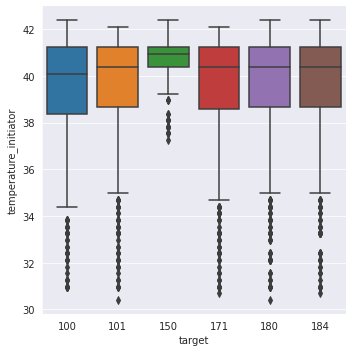

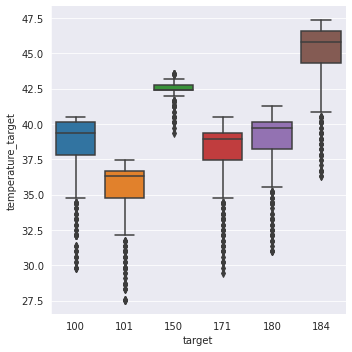

In [14]:
sns.catplot(data=df, x='target', y='temperature_initiator', kind='box')
sns.catplot(data=df, x='target', y='temperature_target', kind='box')

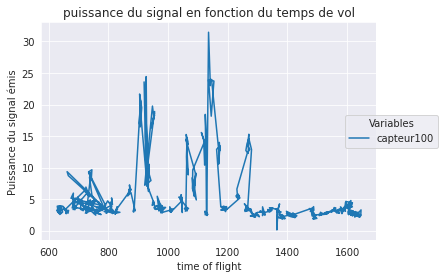

In [15]:
#plot of the figure
plt.figure()
plt.plot(df[df.target == 100]['tof'], df[df.target == 100]['nlos_indicator'], label='capteur100')
#plt.plot(df[df.target == 101]['seqnum'], df[df.target == 101]['t2'], label='capteur101')
plt.xlabel('time of flight')
plt.ylabel('Puissance du signal émis')
plt.title('puissance du signal en fonction du temps de vol')
plt.legend(title="Variables", loc='center right', bbox_to_anchor=(1.2, 0.5))

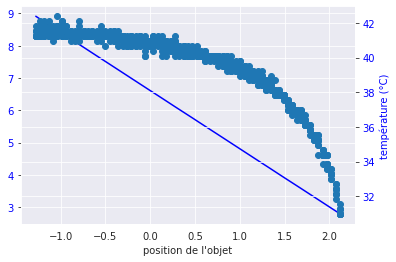

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(df[df.target == 100]['loc_initiator_x'], df[df.target == 100]['loc_initiator_y'], 'b-')
ax1.set_xlabel("position de l'objet")

ax1.set_ylabel('', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.scatter(data = df[df.target == 100], x='loc_initiator_x', y='temperature_initiator')
ax2.set_ylabel('température (°C)', color='b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
plt.savefig('ShareAxes.png')    
plt.show()

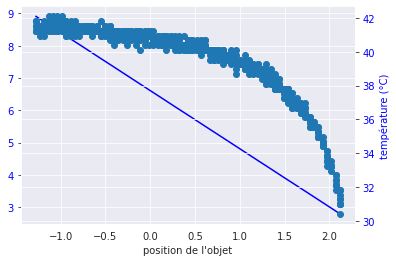

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(df[df.target == 101]['loc_initiator_x'], df[df.target == 101]['loc_initiator_y'], 'b-')
ax1.set_xlabel("position de l'objet")

ax1.set_ylabel('', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.scatter(data = df[df.target == 101], x='loc_initiator_x', y='temperature_initiator')
ax2.set_ylabel('température (°C)', color='b')
for tl in ax2.get_yticklabels():
    tl.set_color('b')
plt.savefig('ShareAxes.png')    
plt.show()

In [ ]:
df[df.target == 100]['timestamp']

0      1654929794228
1      1654929795219
2      1654929796210
3      1654929797201
4      1654929798190
           ...      
638    1654930834351
639    1654930835508
640    1654930836666
641    1654930837824
642    1654930838982
Name: timestamp, Length: 643, dtype: int64

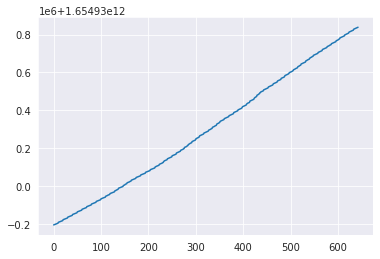

In [ ]:
plt.plot(df[df.target == 100]['timestamp'])

In [ ]:
df.head()

,initiator,target,protocol,nlos_indicator,t1,t2,t3,t4,skew,tof,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,register_dump_CIR
0,183,100,TWR,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,...,0.0,30.98,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,"{""ACC_MEM"": ""AAT/9gACAAr/+wABAAL/8wAS//AACgAGA..."
1,183,100,TWR,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,...,0.0,30.98,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,"{""ACC_MEM"": ""//gAEwAC//X/9gAXABEACwASABQAFgAG/..."
2,183,100,TWR,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,...,0.0,30.98,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,"{""ACC_MEM"": ""//QABQAJ//X/9gAUABMADv/3//r//gAK/..."
3,183,100,TWR,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,...,0.0,30.98,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,"{""ACC_MEM"": ""ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA..."
4,183,100,TWR,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,...,0.0,30.98,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,"{""ACC_MEM"": ""//b/+P/6//3/8QAI//H//P/1AAkAAv/3A..."
